# Importing Data

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hafsahdawood","key":"dfa6944d1efa95af4b76b01ad714b9b0"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d utkarsharya/ecommerce-purchases


  0% 0.00/984k [00:00<?, ?B/s]
100% 984k/984k [00:00<00:00, 16.5MB/s]


In [4]:
!unzip ecommerce-purchases.zip

Archive:  ecommerce-purchases.zip
  inflating: Ecommerce Purchases     


# Libraries Needed

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import os
import random
import re
import sys

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib as mpl

# Visualizing data

In [6]:
dataset=pd.read_csv("/content/ecommerce-purchases.zip")
##saving column names in labels
labels=dataset.columns
dataset.head(3)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95


In [7]:
##So we have 10000 rows and 14 columns. 
dataset.shape

(10000, 14)

In [8]:
##checking for any null value
dataset.isnull().sum()

Address             0
Lot                 0
AM or PM            0
Browser Info        0
Company             0
Credit Card         0
CC Exp Date         0
CC Security Code    0
CC Provider         0
Email               0
Job                 0
IP Address          0
Language            0
Purchase Price      0
dtype: int64

In [9]:
##brief summary of the data in Purchase column
dataset['Purchase Price'].describe()

count    10000.000000
mean        50.347302
std         29.015836
min          0.000000
25%         25.150000
50%         50.505000
75%         75.770000
max         99.990000
Name: Purchase Price, dtype: float64

In [10]:
## seeing all unique values in the dataset along with the number of times they appear
##for i in labels: 
  ##print(dataset[i].value_counts())

# Seeing which CC provider is normally user. 

Also understanding where other providers stand.


The beneift of this is that you as a provider would like to know the completion 



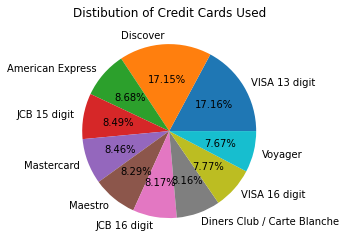

In [11]:
plt.pie(dataset['CC Provider'].value_counts(), labels=set(dataset['CC Provider']), autopct="%1.2f%%")
plt.title("Distibution of Credit Cards Used")
plt.savefig("card_distribution.png")
plt.show()

In [12]:
df=dataset
companies = df.groupby('CC Provider')
df2 = companies.apply(lambda x: x['Company'].unique())
df2

CC Provider
American Express               [Rivera, Buchanan and Ramirez, Fernandez, Melt...
Diners Club / Carte Blanche    [Brown, Watson and Andrews, Garcia-Steele, Sta...
Discover                       [Williams, Marshall and Buchanan, Silva-Anders...
JCB 15 digit                   [Kim-Oliver, Morris PLC, Reed Inc, Morgan, Dun...
JCB 16 digit                   [Martinez-Herman, Simpson, Williams and Pham, ...
Maestro                        [Santana, Montes and Pierce, Goodwin Ltd, Sanc...
Mastercard                     [Fletcher, Richards and Whitaker, Beard, Abbot...
VISA 13 digit                  [Marshall-Collins, Cruz Inc, Stephens, Johnson...
VISA 16 digit                  [Gibson and Sons, Moore-Martin, Keller PLC, Le...
Voyager                        [Strickland, Michael and Gonzales, Saunders-Me...
dtype: object

In [13]:
for i in dataset['CC Provider'].unique():
  
  print("For Card Provider ",i, "Number of Unique companies are")
  print(len(df2[i]))
  print('############################')
  

For Card Provider  JCB 16 digit Number of Unique companies are
1658
############################
For Card Provider  Mastercard Number of Unique companies are
800
############################
For Card Provider  Discover Number of Unique companies are
805
############################
For Card Provider  Diners Club / Carte Blanche Number of Unique companies are
755
############################
For Card Provider  VISA 16 digit Number of Unique companies are
1641
############################
For Card Provider  VISA 13 digit Number of Unique companies are
764
############################
For Card Provider  American Express Number of Unique companies are
824
############################
For Card Provider  Voyager Number of Unique companies are
806
############################
For Card Provider  JCB 15 digit Number of Unique companies are
848
############################
For Card Provider  Maestro Number of Unique companies are
827
############################


Top email domains and job titles

In [14]:
dataset['Job'].value_counts()

Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
                                 ..
Prison officer                    7
Editor, film/video                6
Actuary                           6
Information systems manager       5
Investment analyst                5
Name: Job, Length: 623, dtype: int64

In [15]:
job_purchase = dataset.groupby('Job')['Purchase Price'].sum()
display(job_purchase)

Job
Academic librarian                   527.47
Accommodation manager                629.65
Accountant, chartered               1051.31
Accountant, chartered certified     1043.01
Accountant, chartered management    1036.24
                                     ...   
Water quality scientist              837.47
Web designer                        1195.29
Wellsite geologist                  1231.42
Writer                               448.63
Youth worker                         729.24
Name: Purchase Price, Length: 623, dtype: float64

In [16]:
top_domain=[]

for i in dataset['Email']:
  val=i.split('@')[1]
  top_domain.append(val)
dataset['Domain']=top_domain

In [17]:
dataset.head(2)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,Domain
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,yahoo.com
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,reed.com


In [50]:
dataset.Domain.value_counts()

hotmail.com            1638
yahoo.com              1616
gmail.com              1605
smith.com                42
williams.com             37
                       ... 
booker.com                1
woods-allen.biz           1
richards-wilson.com       1
morris-thomas.com         1
wade-garner.com           1
Name: Domain, Length: 3416, dtype: int64

**Top 5 email domains used by customers**


In [60]:
dataset.Domain.value_counts().head(5)


hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Domain, dtype: int64

Language and Purchase comparison

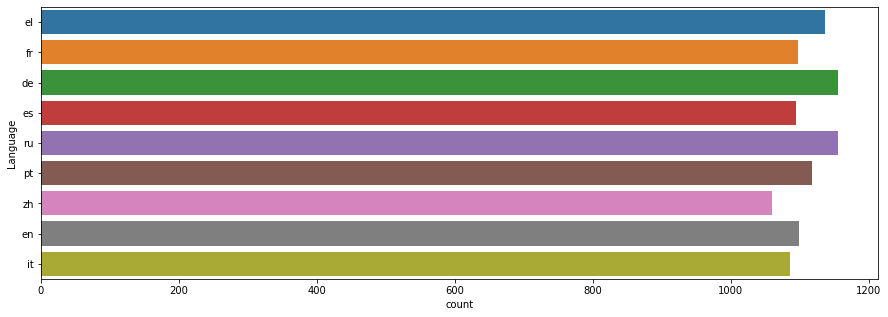

In [19]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Language' , data = dataset)
plt.show()

In [20]:
lang_price_sum = dataset.groupby(['Language'])['Purchase Price'].sum()

In [21]:
from matplotlib.cm import get_cmap

name = "Accent"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list


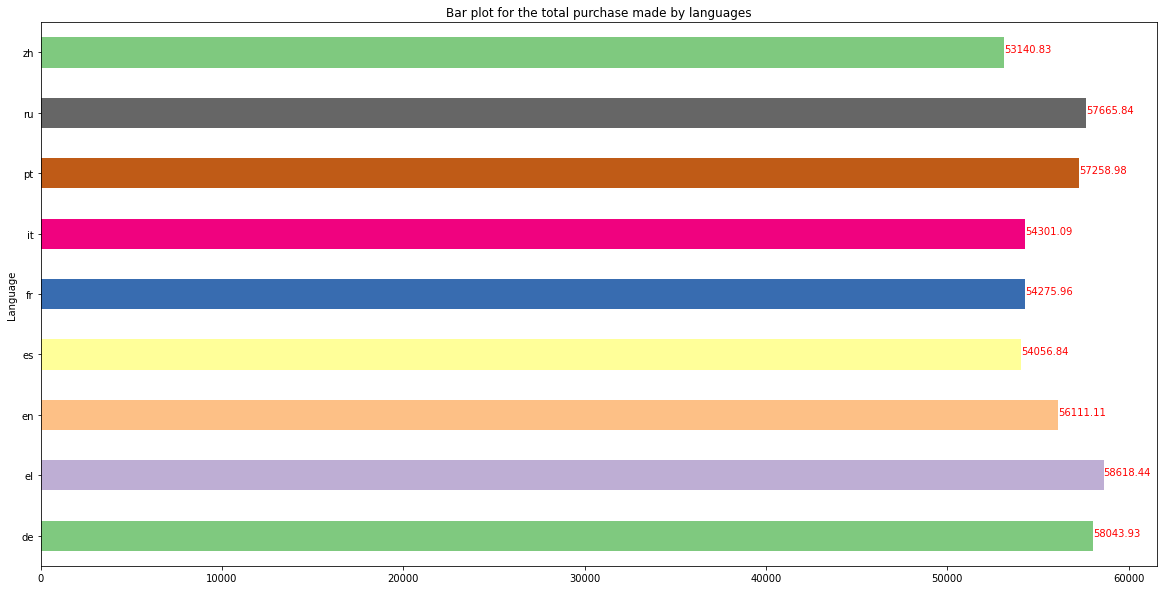

In [22]:
plt.figure(figsize=(20,10))
lang_price_sum.plot(kind='barh',title='Bar plot for the total purchase made by languages',color=colors)
for i, v in enumerate(lang_price_sum):
    plt.text(v, i , str(round(v, 2)), color='red')
plt.savefig("lang_vs_purchase.png")
plt.show()

In [24]:
user_purchase = dataset.groupby('Email')['Purchase Price'].sum()
user_purchase.to_frame().head().sort_values(by=['Purchase Price'],ascending=False)


,Purchase Price
Email,
aalvarez@yahoo.com,73.83
aacosta@maddox-mann.info,72.49
aandersen@gmail.com,13.31
aallen@yahoo.com,12.07
aabbott@hotmail.com,3.55
